# 1 Intro

ใช้ NumPy กับ Pandas กับ Data 2D ในโปรเจคนี้ เป็นข้อมูลการเดินทางบนรถไฟฟ้ากับสภาพอากาศ (อยู่ในตารางเดียวกัน)

In [235]:
import pandas as pd

subway_weather = pd.read_csv('../data/chapter3/nyc_subway_weather.csv')

# 2 Q : Subway Data
ดูข้อมูลแล้วตั้งคำถามที่คิดว่าจะสามารถรู้ได้จากข้อมูลชุดนี้

In [236]:
print(subway_weather.columns)

Index(['UNIT', 'DATEn', 'TIMEn', 'ENTRIESn', 'EXITSn', 'ENTRIESn_hourly',
       'EXITSn_hourly', 'datetime', 'hour', 'day_week', 'weekday', 'station',
       'latitude', 'longitude', 'conds', 'fog', 'precipi', 'pressurei', 'rain',
       'tempi', 'wspdi', 'meanprecipi', 'meanpressurei', 'meantempi',
       'meanwspdi', 'weather_lat', 'weather_lon'],
      dtype='object')


In [237]:
pd.set_option('display.max_columns', None) #ไม่ให้มันย่อ column เป็น ...
pd.DataFrame(subway_weather[:5])

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,weekday,station,latitude,longitude,conds,fog,precipi,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,0,CYPRESS HILLS,40.689945,-73.872564,Clear,0,0.0,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,0,CYPRESS HILLS,40.689945,-73.872564,Partly Cloudy,0,0.0,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,0,CYPRESS HILLS,40.689945,-73.872564,Mostly Cloudy,0,0.0,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,0,CYPRESS HILLS,40.689945,-73.872564,Mostly Cloudy,0,0.0,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,0,CYPRESS HILLS,40.689945,-73.872564,Mostly Cloudy,0,0.0,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


จากข้อมูลแสดงถึงเวลา สถานที่ การเข้า-ออกจากสถานนีรถไฟฟ้า ร่วมกับ สภาพอากาศในขณะนั้น จึงมีคำถามในใจที่อยากรู้ประมาณว่า

1. วันไหนในรอบสัปดาห์ที่คนชอบและไม่ชอบเดินทาง
2. สภาพอากาศแบบไหนที่คนชอบเดินทาง และไม่ชอบเดินทาง
3. location ไหนที่คนพลุกพล่าน
4. คนแต่ละ location ชอบเดินทางที่สภาพอากาศแบบไหน
5. สายรถไฟฟ้าไหนที่คนชอบตอนร้อน หนาว ฝน ฯ

คำถามที่เจอใน board

1. จำนวนผู้โดยสารเปลี่ยนแปลงยังไงในวันหนึ่งๆ
2. มีการเปลี่ยนแปลงจำนวนการเดินทางเป็นอย่างไรในเดือน
3. ที่ไหนคนเข้าเยอะ/ออกเยอะ
4. ที่ไหนที่จำนวนต่างระหว่างเข้า/ออกเยอะ

### เฉลย
คิดก่อนว่าตัวแปรไรมีผลต่อจำนวนการเดินทาง(ridership)บ้าง 
- station ไหนคนเยอะ
- ridership pattern เป็นอย่างไรกับเวลา
- สภาพอากาศส่งผลต่อ ridership ยังไง

มี panttern อะไรที่เราจะหาได้จากสภาพอากาศไหม
- อุณหภูมิ มี pattern เป็นอย่างไรบ้างในแต่ละเดือน
- สภาพอากาศเปลี่ยนแปลงอย่างไรตามเมือง

# 3 Q : Two-Dimensional NumPy Arrays

### 2D data
- Python : list of lists
- NumPy : 2D array <- เริ่มจากตรงนี้ simplier
- Pandas : DataFrame
 
$$ a =
\begin{bmatrix}
    1 & 2 & 3 & 4 \\
    5 & 6 & 7 & 8 \\
    9 & 10 & 11 & 12 \\
    13 & 14 & 15 & 16 \\
\end{bmatrix}
$$

2D arrays, as opposed to array of arrays:
 - More memory efficient
 - Accessing elements is a bit different ถ้าจะเอาเลข 8 ต้องพิมพ์ $a[1,3]$ แทนที่จะพิมพ์ $a[1][3]$ แบบใน array of arrays
 - $mean()$, $std()$, etc. operate on entire array คิดจากทุกตัวใน array แต่ของ python จะได้แค่ทีละ row (array)
 
### แก้ฟังก์ชั่น mean_riders_for_max_station

In [238]:
import numpy as np

# Subway ridership for 5 stations on 10 different days
ridership = np.array([
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])

# Change False to True for each block of code to see what it does

# Accessing elements
if False:
    print(ridership[1, 3])
    print(ridership[1:3, 3:5])
    print(ridership[1, :])
    
# Vectorized operations on rows or columns
if False:
    print(ridership[0, :] + ridership[1, :])
    print(ridership[:, 0] + ridership[:, 1])
    
# Vectorized operations on entire arrays
if False:
    a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
    b = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]])
    print(a + b)

def mean_riders_for_max_station(ridership):
    '''
    Fill in this function to find the station with the maximum riders on the
    first day, then return the mean riders per day for that station. Also
    return the mean ridership overall for comparsion.
    
    Hint: NumPy's argmax() function might be useful:
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html
    '''
    # row เป็น day, column เป็น station
    overall_mean = ridership.mean() 
    max_column   = ridership[0,:].argmax()
    mean_for_max = ridership[:,max_column].mean()
    return (overall_mean, mean_for_max)

In [239]:
mean_riders_for_max_station(ridership)

(2342.5999999999999, 3239.9000000000001)

# 4 Q : NumPy Axis

$$ a =
\begin{bmatrix}
    1 & 2 & 3 & 4 \\
    5 & 6 & 7 & 8 \\
    9 & 10 & 11 & 12 \\
    13 & 14 & 15 & 16 \\
\end{bmatrix}
$$

เมื่อมี array 2D บางครั้งเราก็ต้องการดำเนิน operation ในแนว column หรือบางครั้งกับในแนว row 

built-in function ใน NumPy เราสามารถให้มันดำเนินการกับแนว row หรือ column ได้ จาก .mean(axis=0) .mean(axis=1)

โดย axis=0 คือ ดำเนินการในแนว column, axis=1 ดำเนินการในแนว row

### Exercise

In [240]:
import numpy as np

# Change False to True for this block of code to see what it does

# NumPy axis argument
if False:
    a = np.array([
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]
    ])
    
    print(a.sum())
    print(a.sum(axis=0))
    print(a.sum(axis=1))
    
# Subway ridership for 5 stations on 10 different days
ridership = np.array([
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])

def min_and_max_riders_per_day(ridership):
    '''
    Fill in this function. First, for each subway station, calculate the
    mean ridership per day. Then, out of all the subway stations, return the
    maximum and minimum of these values. That is, find the maximum
    mean-ridership-per-day and the minimum mean-ridership-per-day for any
    subway station.
    '''
#     mean_ridership_per_day = ridership.mean(axis=1)
    max_daily_ridership = ridership.mean(axis=0).max()
    min_daily_ridership = ridership.mean(axis=0).min()
    
    return (max_daily_ridership, min_daily_ridership)

In [241]:
min_and_max_riders_per_day(ridership)

(3239.9000000000001, 1071.2)

# 5 NumPy And Pandas Data Types



In [242]:
import numpy as np

In [243]:
np.array([1,2,3,4,5]).dtype

dtype('int64')

NumPy array นั้นบังคับว่าข้อมูลทั้งหมดต้องเป็น type เดียวกัน ซึ่งข้อมูลในไฟล์ csv ส่วนใหญ่ไม่เป็นงั้น มักมีบาง column ที่เป็น string ดังนั้น np จะมมองทั้งหมดเป็น str ทำให้หา mean ของ str ไม่ได้ แต่ pandas แก้ปัญหาได้ เพราะมันคิดว่าแต่ละ column มี type ต่างกัน






In [244]:
import pandas as pd

enrollments_df = pd.DataFrame({
    'account_key': [448, 448, 448, 448, 448],
    'status': ['canceled', 'canceled', 'canceled', 'canceled', 'current'],
    'join_date': ['2014-11-10', '2014-11-05', '2015-01-27', '2014-11-10', '2014-11-03'],
    'days_to_cancel': [65,5,0,0,np.nan],
    'is_udacity': [True,True,True,True,True]
})

In [245]:
enrollments_df

,account_key,days_to_cancel,is_udacity,join_date,status
0,448,65.0,True,2014-11-10,canceled
1,448,5.0,True,2014-11-05,canceled
2,448,0.0,True,2015-01-27,canceled
3,448,0.0,True,2014-11-10,canceled
4,448,NaN,True,2014-11-03,current


In [246]:
enrollments_df.mean()

account_key       448.0
days_to_cancel     17.5
is_udacity          1.0
dtype: float64

จะเห็นว่ามันจะหา mean ให้ทุก column ที่มี type เป็น float, int

# 6 Q : Accessing Elements Of A DataFrame

เราสามารถแปลง pandas DataFrame ให้อยู่ในรูป NumPy array ได้โดย $ datapandas.values $ (คีย์หายหมด)

In [247]:
import pandas as pd

# Subway ridership for 5 stations on 10 different days
ridership_df = pd.DataFrame(
    data=[[   0,    0,    2,    5,    0],
          [1478, 3877, 3674, 2328, 2539],
          [1613, 4088, 3991, 6461, 2691],
          [1560, 3392, 3826, 4787, 2613],
          [1608, 4802, 3932, 4477, 2705],
          [1576, 3933, 3909, 4979, 2685],
          [  95,  229,  255,  496,  201],
          [   2,    0,    1,   27,    0],
          [1438, 3785, 3589, 4174, 2215],
          [1342, 4043, 4009, 4665, 3033]],
    index=['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
           '05-06-11', '05-07-11', '05-08-11', '05-09-11', '05-10-11'],
    columns=['R003', 'R004', 'R005', 'R006', 'R007']
)

In [248]:
# DataFrame creation
# You can create a DataFrame out of a dictionary mapping column names to values
df_1 = pd.DataFrame({'A': [0, 1, 2], 'B': [3, 4, 5]})
print(df_1)

# You can also use a list of lists or a 2D NumPy array
df_2 = pd.DataFrame([[0, 1, 2], [3, 4, 5]], columns=['A', 'B', 'C'])
print(df_2)

   A  B
0  0  3
1  1  4
2  2  5
   A  B  C
0  0  1  2
1  3  4  5


In [249]:
# Accessing elements
print(ridership_df.iloc[0])
print(ridership_df.loc['05-05-11'])
print(ridership_df['R003'])
print(ridership_df.iloc[1, 3])

R003    0
R004    0
R005    2
R006    5
R007    0
Name: 05-01-11, dtype: int64
R003    1608
R004    4802
R005    3932
R006    4477
R007    2705
Name: 05-05-11, dtype: int64
05-01-11       0
05-02-11    1478
05-03-11    1613
05-04-11    1560
05-05-11    1608
05-06-11    1576
05-07-11      95
05-08-11       2
05-09-11    1438
05-10-11    1342
Name: R003, dtype: int64
2328


In [250]:
# Accessing multiple rows
print(ridership_df.iloc[1:4])

          R003  R004  R005  R006  R007
05-02-11  1478  3877  3674  2328  2539
05-03-11  1613  4088  3991  6461  2691
05-04-11  1560  3392  3826  4787  2613


In [251]:
# Accessing multiple columns
print(ridership_df[['R003', 'R005']])

          R003  R005
05-01-11     0     2
05-02-11  1478  3674
05-03-11  1613  3991
05-04-11  1560  3826
05-05-11  1608  3932
05-06-11  1576  3909
05-07-11    95   255
05-08-11     2     1
05-09-11  1438  3589
05-10-11  1342  4009


In [252]:
# Pandas axis
df = pd.DataFrame({'A': [0, 1, 2], 'B': [3, 4, 5]})
print(df.sum())
print(df.sum(axis=1))
print(df.values.sum())

A     3
B    12
dtype: int64
0    3
1    5
2    7
dtype: int64
15


### Exercise

In [253]:
def mean_riders_for_max_station(ridership):
    '''
    Fill in this function to find the station with the maximum riders on the
    first day, then return the mean riders per day for that station. Also
    return the mean ridership overall for comparsion.
    
    This is the same as a previous exercise, but this time the
    input is a Pandas DataFrame rather than a 2D NumPy array.
    '''
    overall_mean = ridership.values.mean()
    max_column = ridership.values[0].argmax()
    mean_for_max = ridership.values[:,max_column].mean()
    
    return (overall_mean, mean_for_max)

In [254]:
mean_riders_for_max_station(ridership_df)

(2342.5999999999999, 3239.9000000000001)

จะเห็นว่าเหมือนที่ทำกับ numpy เลย ต่างแค่ต้องมี .values ก่อน หรืออีกแบบคือ

In [255]:
def mean_riders_for_max_station2(ridership):

    overall_mean = ridership.values.mean()
    max_column = ridership.iloc[0].argmax()
    mean_for_max = ridership[max_column].mean()
    
    return (overall_mean, mean_for_max)

In [256]:
mean_riders_for_max_station2(ridership_df)

(2342.5999999999999, 3239.9)

# 7 Loading Data Into A DataFrame

In [257]:
import pandas as pd

ny_subway_weather = pd.read_csv('../data/chapter3/nyc_subway_weather.csv')

In [259]:
ny_subway_weather.head() #print 5 first row

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,weekday,station,latitude,longitude,conds,fog,precipi,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,0,CYPRESS HILLS,40.689945,-73.872564,Clear,0,0.0,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,0,CYPRESS HILLS,40.689945,-73.872564,Partly Cloudy,0,0.0,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,0,CYPRESS HILLS,40.689945,-73.872564,Mostly Cloudy,0,0.0,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,0,CYPRESS HILLS,40.689945,-73.872564,Mostly Cloudy,0,0.0,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,0,CYPRESS HILLS,40.689945,-73.872564,Mostly Cloudy,0,0.0,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [260]:
ny_subway_weather.describe()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,precipi,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
count,4.264900e+04,4.264900e+04,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000
mean,2.812486e+07,1.986993e+07,1886.589955,1361.487866,10.046754,2.905719,0.714436,40.724647,-73.940364,0.009824,0.004618,29.971096,0.224741,63.103780,6.927872,0.004618,29.971096,63.103780,6.927872,40.728555,-73.938693
std,3.043607e+07,2.028986e+07,2952.385585,2183.845409,6.938928,2.079231,0.451688,0.071650,0.059713,0.098631,0.025832,0.137942,0.417417,8.455597,4.510178,0.016344,0.131158,6.939011,3.179832,0.065420,0.059582
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,40.576152,-74.073622,0.000000,0.000000,29.550000,0.000000,46.900000,0.000000,0.000000,29.590000,49.400000,0.000000,40.600204,-74.014870
25%,1.039762e+07,7.613712e+06,274.000000,237.000000,4.000000,1.000000,0.000000,40.677107,-73.987342,0.000000,0.000000,29.890000,0.000000,57.000000,4.600000,0.000000,29.913333,58.283333,4.816667,40.688591,-73.985130
50%,1.818389e+07,1.331609e+07,905.000000,664.000000,12.000000,3.000000,1.000000,40.717241,-73.953459,0.000000,0.000000,29.960000,0.000000,61.000000,6.900000,0.000000,29.958000,60.950000,6.166667,40.720570,-73.949150
75%,3.263049e+07,2.393771e+07,2255.000000,1537.000000,16.000000,5.000000,1.000000,40.759123,-73.907733,0.000000,0.000000,30.060000,0.000000,69.100000,9.200000,0.000000,30.060000,67.466667,8.850000,40.755226,-73.912033
max,2.357746e+08,1.493782e+08,32814.000000,34828.000000,20.000000,6.000000,1.000000,40.889185,-73.755383,1.000000,0.300000,30.320000,1.000000,86.000000,23.000000,0.157500,30.293333,79.800000,17.083333,40.862064,-73.694176


# 8 Q : Calculating Correlation (population correlation coefficient)

$
\begin{bmatrix}
    x_{1} & y_{1} \\
    x_{2} & y_{2} \\
    x_{3} & y_{3} \\
    \vdots & \vdots \\
\end{bmatrix}
$

จากค่าข้อมูลชุดนี้ เราสงสัยถึงความสัมพันธ์ระหว่างข้อมูลชุด $x$ กับ $y$ 

เราสามารถหาความสัมพันธ์ของชุดข้อมูลได้โดยใช้ Pearson's r หรืออีกชื่อคือ Pearson's correlation coefficient (กรณีข้อมูลทั้งหมด): 

$$\rho_{X,Y} = \frac{cov(X,Y)}{\sigma_{X}\sigma_{Y}} = \frac{E[(X-\mu_{X})(Y-\mu_{Y})]}{\sigma_{X}\sigma_{Y}}  $$

เมื่อ
- $X$ คือ $\begin{bmatrix} x_{1} \\ x_{2} \\ x_{3} \\ \vdots\\ \end{bmatrix}$ $Y$ คือ $\begin{bmatrix} y_{1} \\ y_{2} \\ y_{3} \\ \vdots\\ \end{bmatrix}$
- $cov$ is the covariance
- $\sigma_{X}$ is the standard deviation(ค่าSD) of $X$
- $\mu_{X}$ is the mean of $X$
- $E$ is the expectation.

กรณีข้อมูลที่ใช้เป็น sample 

$$r = \frac{\Sigma_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})}{\sqrt{\Sigma_{i=1}^{n}(x_{i}-\bar{x})^{2}}\sqrt{\Sigma_{i=1}^{n}(y_{i}-\bar{y})^{2}}}$$

เมื่อ
- $n$ คือ sample size
- $x_{i},y_{i}$ are the single samples indexed with i
- ${\bar {x}}={\frac {1}{n}}\sum _{i=1}^{n}x_{i}$ (the sample mean)

ค่าความสัมพันธ์มีตั้งแต่ -1 ถึง 1 อันไหนใกล้ 0 คือสัมพันธ์กันน้อย -1 ตรงข้ามกัน +1 คือไปทางเดียวกัน

## ตัวอย่างแบบ manual เอง

In [44]:
import pandas as pd
import numpy as np

filename = '../data/chapter3/nyc_subway_weather.csv'
subway_df = pd.read_csv(filename)

def correlation(x, y):
    '''
    Fill in this function to compute the correlation between the two
    input variables. Each input is either a NumPy array or a Pandas
    Series.
    
    correlation = average of (x in standard units) times (y in standard units)
    
    Remember to pass the argument "ddof=0" to the Pandas std() function!
    '''
    x_bar = x.mean()
    y_bar = y.mean()
    top = (x-x_bar)*(y-y_bar)
    sum_top = top.sum()
    std_x = (((x-x_bar)**2).sum())**(1/2)
    std_y = (((y-y_bar)**2).sum())**(1/2)
    bottom = std_x*std_y
    
    return sum_top/bottom

entries = subway_df['ENTRIESn_hourly']
cum_entries = subway_df['ENTRIESn']
rain = subway_df['meanprecipi']
temp = subway_df['meantempi']

print(correlation(entries, rain))
print(correlation(entries, temp))
print(correlation(rain, temp))
print(correlation(entries, cum_entries))

0.035648515772231326
-0.02669334832156992
-0.22903432340833518
0.585895470766216


## แบบเฉลย (ใช้ function ของ pandas)

An equivalent expression gives the formula for r as the **mean of the products of the standard scores** as follows:

$$ r = r_{xy} = \frac{1}{n-1}\sum_{i=1}^{n}\left(\frac{x_{i}-\bar {x}}{s_{x}}\right)\left(\frac{y_{i}-\bar{y}}{s_{y}}\right)$$

เมื่อ
- $\left(\frac{x_{i}-\bar {x}}{s_{x}}\right)$  is the standard score
- $s_{x}=\sqrt{{\frac{1}{n-1}}\sum_{i=1}^{n}(x_{i}-\bar{x})^{2}}$ the sample standard deviation > คือ pd.std(ddof=0)

In [64]:
import pandas as pd
def correlationAns(x, y):

    std_x = (x-x.mean()) / x.std(ddof=0) #จากตรงนี้เข้าใจว่า หารด้วย n ไม่ใช่ n-1 นะ
    std_y = (y-y.mean()) / y.std(ddof=0)
    
    return (std_x*std_y).mean()

In [67]:
print(correlationAns(entries, rain))
print(correlationAns(entries, temp))
print(correlationAns(rain, temp))
print(correlationAns(entries, cum_entries))

0.03564851577223041
-0.026693348321569912
-0.22903432340833663
0.5858954707662182


## ใช้ function ของ numpy เลย (ใช้จริงใช้อันนี้ เร็วสุด)

In [69]:
import numpy as np

print(np.corrcoef(entries, rain)[0,1])
print(np.corrcoef(entries, temp)[0,1])
print(np.corrcoef(rain, temp)[0,1])
print(np.corrcoef(entries, cum_entries)[0,1])

0.0356485157722
-0.0266933483216
-0.229034323408
0.585895470766


# 9 Pandas Axis Names

ใช้ระบุว่าให้หาผลลัพธ์พวก .mean(), .sum() ในแนวไหน 

อย่างใน numpy จะใช้ axis=0 หรือ axis=1
ส่วน pandas ใช้ axis='index' or axis='columns'

ผลมันจะแปลกๆ จำยาก คือ axis='columns' ผลจะออกมาตาม row 

เอาให้ชัวคือลอง run ออกมาดูก่อน

# 10 Q : DataFrame Vectorized Operations

In [78]:
import pandas as pd

# Examples of vectorized operations on DataFrames:
# Change False to True for each block of code to see what it does

# Adding DataFrames with the column names
if True:
    df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})
    df2 = pd.DataFrame({'a': [10, 20, 30], 'b': [40, 50, 60], 'c': [70, 80, 90]})
    print (df1 + df2)
    
# Adding DataFrames with overlapping column names 
if True:
    df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})
    df2 = pd.DataFrame({'d': [10, 20, 30], 'c': [40, 50, 60], 'b': [70, 80, 90]})
    print (df1 + df2)

# Adding DataFrames with overlapping row indexes
if True:
    df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]},
                       index=['row1', 'row2', 'row3'])
    df2 = pd.DataFrame({'a': [10, 20, 30], 'b': [40, 50, 60], 'c': [70, 80, 90]},
                       index=['row4', 'row3', 'row2'])
    print (df1 + df2)

    a   b   c
0  11  44  77
1  22  55  88
2  33  66  99
    a   b   c   d
0 NaN  74  47 NaN
1 NaN  85  58 NaN
2 NaN  96  69 NaN
         a     b     c
row1   NaN   NaN   NaN
row2  32.0  65.0  98.0
row3  23.0  56.0  89.0
row4   NaN   NaN   NaN


In [196]:
# --- Quiz ---
# Cumulative entries and exits for one station for a few hours.
entries_and_exits = pd.DataFrame({
    'ENTRIESn': [3144312, 3144335, 3144353, 3144424, 3144594,
                 3144808, 3144895, 3144905, 3144941, 3145094],
    'EXITSn': [1088151, 1088159, 1088177, 1088231, 1088275,
               1088317, 1088328, 1088331, 1088420, 1088753]
})

entries_and_exits

,ENTRIESn,EXITSn
0,3144312,1088151
1,3144335,1088159
2,3144353,1088177
3,3144424,1088231
4,3144594,1088275
5,3144808,1088317
6,3144895,1088328
7,3144905,1088331
8,3144941,1088420
9,3145094,1088753


In [197]:
def get_hourly_entries_and_exits(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits (entries in the first column, exits in the second) 
    and
    return a DataFrame with hourly entries and exits (entries in the
    first column, exits in the second).
    '''
    hourly_entries_and_exits = entries_and_exits - entries_and_exits.shift(periods=1)
    
    return hourly_entries_and_exits

In [198]:
get_hourly_entries_and_exits(entries_and_exits)

,ENTRIESn,EXITSn
0,NaN,NaN
1,23.0,8.0
2,18.0,18.0
3,71.0,54.0
4,170.0,44.0
5,214.0,42.0
6,87.0,11.0
7,10.0,3.0
8,36.0,89.0
9,153.0,333.0


In [199]:
entries_and_exits.diff()

,ENTRIESn,EXITSn
0,NaN,NaN
1,23.0,8.0
2,18.0,18.0
3,71.0,54.0
4,170.0,44.0
5,214.0,42.0
6,87.0,11.0
7,10.0,3.0
8,36.0,89.0
9,153.0,333.0


# 11 Q : DataFrame Applymap()

## Non-Built-In functions for DataFrames

คล้ายกับ .apply() ของ pandas series อันนี้ใช้ .applymap() ซึ่งมีส่วนต่างกันนิดหน่อย จะบอกในบทถัดไป

In [202]:
import pandas as pd

# Change False to True for this block of code to see what it does

# DataFrame applymap()
if True:
    df = pd.DataFrame({
        'a': [1, 2, 3],
        'b': [10, 20, 30],
        'c': [5, 10, 15]
    })
    
    def add_one(x):
        return x + 1
        
    print (df.applymap(add_one))

   a   b   c
0  2  11   6
1  3  21  11
2  4  31  16


## Quiz

In [210]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

def convert_grade(grade):
    if grade < 60:
        grade = 'F'
    elif grade >= 60 and grade < 70:
        grade = 'D'
    elif grade >= 70 and grade < 80:
        grade = 'C'
    elif grade >= 80 and grade < 90:
        grade =  'B'
    elif grade >=90 and grade <=100:
        grade = 'A'
    else:
        grade = 'NaN'
    
    return grade
    
def convert_grades(grades):
    '''
    Fill in this function to convert the given DataFrame of numerical
    grades to letter grades. Return a new DataFrame with the converted
    grade.
    
    The conversion rule is:
        90-100 -> A
        80-89  -> B
        70-79  -> C
        60-69  -> D
        0-59   -> F
    '''
    
    return grades.applymap(convert_grade)



In [211]:
grades_df

,exam1,exam2
Andre,43,24
Barry,81,63
Chris,78,56
Dan,75,56
Emilio,89,67
Fred,70,51
Greta,91,79
Humbert,65,46
Ivan,98,72
James,87,60


In [212]:
convert_grades(grades_df)

,exam1,exam2
Andre,F,F
Barry,B,D
Chris,C,F
Dan,C,F
Emilio,B,D
Fred,C,F
Greta,A,C
Humbert,D,F
Ivan,A,C
James,B,D


# 12 Q : DataFrame Apply()

#### .applymap()
ใน pandas DataFrame มันจะดำเนินการกับทุก element **พิจารณาทั้ง matrix**

#### .apply()
ใน pandas DataFrame มันจะดำเนินการกับทุก element **ในแต่ละ column** (แยกคิดทีละ column)

In [217]:
import pandas as pd

grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

# Change False to True for this block of code to see what it does

# DataFrame apply()
if True:
    def convert_grades_curve(exam_grades):
        # Pandas has a bult-in function that will perform this calculation
        # This will give the bottom 0% to 10% of students the grade 'F',
        # 10% to 20% the grade 'D', and so on. You can read more about
        # the qcut() function here:
        # http://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
        return pd.qcut(exam_grades,
                       [0, 0.1, 0.2, 0.5, 0.8, 1],
                       labels=['F', 'D', 'C', 'B', 'A'])
        
    # qcut() operates on a list, array, or Series. This is the
    # result of running the function on a single column of the
    # DataFrame.
    print (convert_grades_curve(grades_df['exam1']))
    
    # qcut() does not work on DataFrames, but we can use apply()
    # to call the function on each column separately
    print (grades_df.apply(convert_grades_curve)) #ทำทีละ column
    

Andre      F
Barry      B
Chris      C
Dan        C
Emilio     B
Fred       C
Greta      A
Humbert    D
Ivan       A
James      B
Name: exam1, dtype: category
Categories (5, object): [A < B < C < D < F]
        exam1 exam2
Andre       F     F
Barry       B     B
Chris       C     C
Dan         C     C
Emilio      B     B
Fred        C     C
Greta       A     A
Humbert     D     D
Ivan        A     A
James       B     B


In [231]:
def standardize_column(column):
    return (column-column.mean()) / column.std(ddof=0)

def standardize(df):
    '''
    Fill in this function to standardize each column of the given
    DataFrame. To standardize a variable, convert each value to the
    number of standard deviations it is above or below the mean.
    '''
    return df.apply(standardize_column)

In [232]:
print (standardize_column(grades_df['exam1']))

Andre     -2.315341
Barry      0.220191
Chris      0.020017
Dan       -0.180156
Emilio     0.753987
Fred      -0.513779
Greta      0.887436
Humbert   -0.847401
Ivan       1.354508
James      0.620538
Name: exam1, dtype: float64


In [233]:
print (standardize(grades_df))

            exam1     exam2
Andre   -2.315341 -2.304599
Barry    0.220191  0.386400
Chris    0.020017 -0.096600
Dan     -0.180156 -0.096600
Emilio   0.753987  0.662400
Fred    -0.513779 -0.441600
Greta    0.887436  1.490400
Humbert -0.847401 -0.786600
Ivan     1.354508  1.007400
James    0.620538  0.179400


# 13 Q : DataFrame Apply() Use Case 2

เอาไว้ใช้เวลาต้องการพิจารณาค่าของแต่ละ column เช่น ค่า max(), mean() 

**แต่ละ column จะกลายเป็น single value**

In [236]:
import numpy as np
import pandas as pd

df = pd.DataFrame({
    'a': [4, 5, 3, 1, 2],
    'b': [20, 10, 40, 50, 30],
    'c': [25, 20, 5, 15, 10]
})

# Change False to True for this block of code to see what it does

# DataFrame apply() - use case 2
if True:   
    print (df.apply(np.mean))
    print (df.apply(np.max))

a     3.0
b    30.0
c    15.0
dtype: float64
a     5
b    50
c    25
dtype: int64


In [252]:
def second_largest_column(column):
    new_column = column.drop(column.argmax())
    second_largest = new_column.max()
    return second_largest

def second_largest(df):
    '''
    Fill in this function to return the second-largest value of each 
    column of the input DataFrame.
    '''
    return df.apply(second_largest_column)

In [253]:
second_largest(df)

a     4
b    40
c    20
dtype: int64

# 14 Q : Adding A DataFrame To A Series

สามารถใช้ DataFrame(matrix) + Series(Vector) ได้ แต่คิดว่าได้ค่าออกมาเป็นไง?

In [255]:
import pandas as pd

# Adding a Series to a square DataFrame
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
    0: [10, 20, 30, 40],
    1: [50, 60, 70, 80],
    2: [90, 100, 110, 120],
    3: [130, 140, 150, 160]
})

print (df)
print ('') # Create a blank line between outputs
print (df + s)

    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1    2    3
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [258]:
# Adding a Series to a one-row DataFrame 
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({0: [10], 1: [20], 2: [30], 3: [40]})

print (df)
print ('') # Create a blank line between outputs
print (df + s)

    0   1   2   3
0  10  20  30  40

    0   1   2   3
0  11  22  33  44


In [259]:
# Adding a Series to a one-column DataFrame
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({0: [10, 20, 30, 40]})

print (df)
print ('') # Create a blank line between outputs
print (df + s)

    0
0  10
1  20
2  30
3  40

    0   1   2   3
0  11 NaN NaN NaN
1  21 NaN NaN NaN
2  31 NaN NaN NaN
3  41 NaN NaN NaN


In [261]:
# Adding when DataFrame column names match Series index
s = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
df = pd.DataFrame({
    'a': [10, 20, 30, 40],
    'b': [50, 60, 70, 80],
    'c': [90, 100, 110, 120],
    'd': [130, 140, 150, 160]
})

print (df)
print ('') # Create a blank line between outputs
print (df + s)

    a   b    c    d
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    a   b    c    d
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [262]:
# Adding when DataFrame column names don't match Series index
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
    'a': [10, 20, 30, 40],
    'b': [50, 60, 70, 80],
    'c': [90, 100, 110, 120],
    'd': [130, 140, 150, 160]
})

print (df)
print ('') # Create a blank line between outputs
print (df + s)

    a   b    c    d
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    a   b   c   d   0   1   2   3
0 NaN NaN NaN NaN NaN NaN NaN NaN
1 NaN NaN NaN NaN NaN NaN NaN NaN
2 NaN NaN NaN NaN NaN NaN NaN NaN
3 NaN NaN NaN NaN NaN NaN NaN NaN


# 15 Q : Standardizing Each Column Again

**Note:** In order to get the proper computations, we should actually be setting the value of the "ddof" parameter to 0 in the .std() function.

Note that the type of standard deviation calculated by default is different between numpy's .std() and pandas' .std() functions. By default, numpy calculates a population standard deviation, with "ddof = 0". On the other hand, pandas calculates a sample standard deviation, with "ddof = 1". If we know all of the scores, then we have a population - so to standardize using pandas, we need to set "ddof = 0".

## Quiz

In [537]:
import pandas as pd

# Adding using +
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
    0: [10, 20, 30, 40],
    1: [50, 60, 70, 80],
    2: [90, 100, 110, 120],
    3: [130, 140, 150, 160]
})

print (df)
print ('') # Create a blank line between outputs
print (df + s)

    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1    2    3
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [539]:
# Adding with axis='index'
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
    0: [10, 20, 30, 40],
    1: [50, 60, 70, 80],
    2: [90, 100, 110, 120],
    3: [130, 140, 150, 160]
})

print (df)
print ('') # Create a blank line between outputs
print (df.add(s, axis='index'))
# The functions sub(), mul(), and div() work similarly to add()

    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1    2    3
0  11  51   91  131
1  22  62  102  142
2  33  73  113  153
3  44  84  124  164


In [541]:
# Adding with axis='columns'
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
    0: [10, 20, 30, 40],
    1: [50, 60, 70, 80],
    2: [90, 100, 110, 120],
    3: [130, 140, 150, 160]
})

print (df)
print ('') # Create a blank line between outputs
print (df.add(s, axis='columns'))
# The functions sub(), mul(), and div() work similarly to add()

    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1    2    3
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [542]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

In [543]:

def standardize(df):
    '''
    Fill in this function to standardize each column of the given
    DataFrame. To standardize a variable, convert each value to the
    number of standard deviations it is above or below the mean.
    
    This time, try to use vectorized operations instead of apply().
    You should get the same results as you did before.
    '''
    standardize = (df-df.mean()) / df.std(ddof=0)
    return standardize

def standardize_rows(df):
    '''
    Optional: Fill in this function to standardize each row of the given
    DataFrame. Again, try not to use apply().
    
    This one is more challenging than standardizing each column!
    '''
    standardize = df.sub(df.mean(axis=1), axis='index').div(df.std(ddof=0,axis=1), axis='index')
    return standardize

In [544]:
standardize(grades_df)

,exam1,exam2
Andre,-2.315341,-2.304599
Barry,0.220191,0.386400
Chris,0.020017,-0.096600
Dan,-0.180156,-0.096600
Emilio,0.753987,0.662400
Fred,-0.513779,-0.441600
Greta,0.887436,1.490400
Humbert,-0.847401,-0.786600
Ivan,1.354508,1.007400
James,0.620538,0.179400


In [545]:
standardize_rows(grades_df)

,exam1,exam2
Andre,1.0,-1.0
Barry,1.0,-1.0
Chris,1.0,-1.0
Dan,1.0,-1.0
Emilio,1.0,-1.0
Fred,1.0,-1.0
Greta,1.0,-1.0
Humbert,1.0,-1.0
Ivan,1.0,-1.0
James,1.0,-1.0


# 16 Q : Pandas Groupby()


## Example

In [297]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

# Examine DataFrame
example_df

,above_three,even,value
a,False,False,1
b,False,False,3
c,False,True,2
d,True,True,4
e,False,False,1
f,True,True,6
g,True,True,4


In [301]:
# Examine groups
grouped_data = example_df.groupby('even')
# The groups attribute is a dictionary mapping keys to lists of row indexes
print(grouped_data.groups)

{False: Index(['a', 'b', 'e'], dtype='object'), True: Index(['c', 'd', 'f', 'g'], dtype='object')}


In [304]:
# Group by multiple columns
grouped_data = example_df.groupby(['even', 'above_three'])
print(grouped_data.groups)

{(False, False): Index(['a', 'b', 'e'], dtype='object'), (True, False): Index(['c'], dtype='object'), (True, True): Index(['d', 'f', 'g'], dtype='object')}


In [310]:
# Get sum of each group
grouped_data = example_df.groupby('even')
print(grouped_data.sum())

       above_three  value
even                     
False          0.0      5
True           3.0     16


In [314]:
# Limit columns in result
grouped_data = example_df.groupby('even')

# You can take one or more columns from the result DataFrame
print(grouped_data.sum()['value'])
print('\n') # Blank line to separate results

# You can also take a subset of columns from the grouped data before 
# collapsing to a DataFrame. In this case, the result is the same.
print(grouped_data['value'].sum())

even
False     5
True     16
Name: value, dtype: int64


even
False     5
True     16
Name: value, dtype: int64


## Quiz

In [315]:
filename = '../data/chapter3/nyc_subway_weather.csv'
subway_df = pd.read_csv(filename)

### Write code here to group the subway data by a variable of your choice, then
### either print out the mean ridership within each group or create a plot.

In [333]:
grouped_by_dayweek = subway_df.groupby('day_week')
data_for_plot = grouped_by_dayweek['ENTRIESn_hourly'].mean()

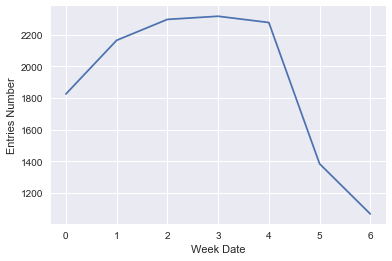

In [334]:
sns.set()
plt.plot(data_for_plot)
plt.ylabel('Entries Number')
plt.xlabel('Week Date')
plt.show()

# 17 Q : Calculating Hourly Entries And Exits

สร้าง calculate column ใหม่ขึ้นมาจากใน column เดิม

In [587]:
import numpy as np
import pandas as pd

values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

# Standardize each group
def standardize(xs):
    return (xs - xs.mean()) / xs.std()
grouped_data = example_df.groupby('even')
print(grouped_data['value'].apply(standardize))

a   -0.577350
b    1.154701
c   -1.224745
d    0.000000
e   -0.577350
f    1.224745
g    0.000000
Name: value, dtype: float64


In [588]:
# Find second largest value in each group
def second_largest(xs):
    sorted_xs = xs.sort_values(inplace=False, ascending=False)
    return sorted_xs.iloc[1]
grouped_data = example_df.groupby('even')
print(grouped_data['value'].apply(second_largest))

even
False    1
True     4
Name: value, dtype: int64


In [589]:
# --- Quiz ---
# DataFrame with cumulative entries and exits for multiple stations
ridership_df = pd.DataFrame({
    'UNIT': ['R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051'],
    'TIMEn': ['00:00:00', '02:00:00', '04:00:00', '06:00:00', '08:00:00', '10:00:00', '12:00:00', '14:00:00', '16:00:00'],
    'ENTRIESn': [3144312, 8936644, 3144335, 8936658, 3144353, 8936687, 3144424, 8936819, 3144594],
    'EXITSn': [1088151, 13755385,  1088159, 13755393,  1088177, 13755598, 1088231, 13756191,  1088275]
})

In [590]:
ridership_df.head()

,ENTRIESn,EXITSn,TIMEn,UNIT
0,3144312,1088151,00:00:00,R051
1,8936644,13755385,02:00:00,R079
2,3144335,1088159,04:00:00,R051
3,8936658,13755393,06:00:00,R079
4,3144353,1088177,08:00:00,R051


In [591]:
def get_hourly_entries_and_exits(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits and return a DataFrame with hourly entries and exits.
    The hourly entries and exits should be calculated separately for
    each station (the 'UNIT' column).
    
    Hint: Take a look at the `get_hourly_entries_and_exits()` function
    you wrote in a previous quiz, DataFrame Vectorized Operations. If
    you copy it here and rename it, you can use it and the `.apply()`
    function to help solve this problem.
    '''
    # group ตาม unit
    grouped = entries_and_exits.groupby(['UNIT'])
    group_names = grouped.groups.keys() # ดึง unit ทั้งหมดที่มี
    
    hourly_entries = pd.Series([])
    hourly_exits   = pd.Series([])
    # วน loop ทีละ unit
    for group_name in group_names:
        # ดูว่าแต่ละ unit มี hourly_time ยังไง
        hourly_exits_by_group   = grouped.get_group(group_name)['EXITSn'] - grouped.get_group(group_name)['EXITSn'].shift(periods=1)
        hourly_entries_by_group = grouped.get_group(group_name)['ENTRIESn'] - grouped.get_group(group_name)['ENTRIESn'].shift(periods=1)
        
        # รวมทุก unit ไว้ใน column เดียวกัน แบบไม่ซ้ำ index
        hourly_exits   = hourly_exits.add(hourly_exits_by_group,fill_value=0)
        hourly_entries = hourly_entries.add(hourly_entries_by_group,fill_value=0)


    # เพิ่ม column ใหม่ของ input DataFrame  
    entries_and_exits['hourly_entries'] = hourly_entries
    entries_and_exits['hourly_exits'] = hourly_exits

    return entries_and_exits

In [592]:
get_hourly_entries_and_exits(ridership_df)

,ENTRIESn,EXITSn,TIMEn,UNIT,hourly_entries,hourly_exits
0,3144312,1088151,00:00:00,R051,NaN,NaN
1,8936644,13755385,02:00:00,R079,NaN,NaN
2,3144335,1088159,04:00:00,R051,23.0,8.0
3,8936658,13755393,06:00:00,R079,14.0,8.0
4,3144353,1088177,08:00:00,R051,18.0,18.0
5,8936687,13755598,10:00:00,R079,29.0,205.0
6,3144424,1088231,12:00:00,R051,71.0,54.0
7,8936819,13756191,14:00:00,R079,132.0,593.0
8,3144594,1088275,16:00:00,R051,170.0,44.0


## เฉลย

In [593]:
def hourly_for_group(entries_and_exits):
    return entries_and_exits - entries_and_exits.shift(1)

In [594]:
ridership_df.groupby('UNIT')[['ENTRIESn','EXITSn']].apply(hourly_for_group)

,ENTRIESn,EXITSn
0,NaN,NaN
1,NaN,NaN
2,23.0,8.0
3,14.0,8.0
4,18.0,18.0
5,29.0,205.0
6,71.0,54.0
7,132.0,593.0
8,170.0,44.0


# 18 Q : Combining Pandas DataFrames

pandas มี function merge ให้เรา join data 2 file เข้าด้วยกันได้

จะมี
- left  เอาฝั่งซ้ายทั้งหมด ส่วนฝั่งขวาเอาแค่ที่มี key ตรงกับฝั่งซ้าย
- right เอาฝั่งขวาทุกตัว ส่วนฝั่งซ้ายเอาเฉพาะที่มี key ตรงกับฝั่งขวา
- inner เอาเฉพาะแถวที่มี key อยู่ในทั้งสองตาราง
- outer เอาทั้งหมด

In [598]:
import pandas as pd

subway_df = pd.DataFrame({
    'UNIT': ['R003', 'R003', 'R003', 'R003', 'R003', 'R004', 'R004', 'R004',
             'R004', 'R004'],
    'DATEn': ['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
              '05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'ENTRIESn': [ 4388333,  4388348,  4389885,  4391507,  4393043, 14656120,
                 14656174, 14660126, 14664247, 14668301],
    'EXITSn': [ 2911002,  2911036,  2912127,  2913223,  2914284, 14451774,
               14451851, 14454734, 14457780, 14460818],
    'latitude': [ 40.689945,  40.689945,  40.689945,  40.689945,  40.689945,
                  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ],
    'longitude': [-73.872564, -73.872564, -73.872564, -73.872564, -73.872564,
                  -73.867135, -73.867135, -73.867135, -73.867135, -73.867135]
})

weather_df = pd.DataFrame({
    'DATEn': ['05-01-11', '05-01-11', '05-02-11', '05-02-11', '05-03-11',
              '05-03-11', '05-04-11', '05-04-11', '05-05-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'latitude': [ 40.689945,  40.69132 ,  40.689945,  40.69132 ,  40.689945,
                  40.69132 ,  40.689945,  40.69132 ,  40.689945,  40.69132 ],
    'longitude': [-73.872564, -73.867135, -73.872564, -73.867135, -73.872564,
                  -73.867135, -73.872564, -73.867135, -73.872564, -73.867135],
    'pressurei': [ 30.24,  30.24,  30.32,  30.32,  30.14,  30.14,  29.98,  29.98,
                   30.01,  30.01],
    'fog': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'rain': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'tempi': [ 52. ,  52. ,  48.9,  48.9,  54. ,  54. ,  57.2,  57.2,  48.9,  48.9],
    'wspdi': [  8.1,   8.1,   6.9,   6.9,   3.5,   3.5,  15. ,  15. ,  15. ,  15. ]
})

In [600]:
subway_df

,DATEn,ENTRIESn,EXITSn,UNIT,hour,latitude,longitude
0,05-01-11,4388333,2911002,R003,0,40.689945,-73.872564
1,05-02-11,4388348,2911036,R003,0,40.689945,-73.872564
2,05-03-11,4389885,2912127,R003,0,40.689945,-73.872564
3,05-04-11,4391507,2913223,R003,0,40.689945,-73.872564
4,05-05-11,4393043,2914284,R003,0,40.689945,-73.872564
5,05-01-11,14656120,14451774,R004,0,40.691320,-73.867135
6,05-02-11,14656174,14451851,R004,0,40.691320,-73.867135
7,05-03-11,14660126,14454734,R004,0,40.691320,-73.867135
8,05-04-11,14664247,14457780,R004,0,40.691320,-73.867135
9,05-05-11,14668301,14460818,R004,0,40.691320,-73.867135


In [601]:
weather_df

,DATEn,fog,hour,latitude,longitude,pressurei,rain,tempi,wspdi
0,05-01-11,0,0,40.689945,-73.872564,30.24,0,52.0,8.1
1,05-01-11,0,0,40.691320,-73.867135,30.24,0,52.0,8.1
2,05-02-11,0,0,40.689945,-73.872564,30.32,0,48.9,6.9
3,05-02-11,0,0,40.691320,-73.867135,30.32,0,48.9,6.9
4,05-03-11,0,0,40.689945,-73.872564,30.14,0,54.0,3.5
5,05-03-11,0,0,40.691320,-73.867135,30.14,0,54.0,3.5
6,05-04-11,0,0,40.689945,-73.872564,29.98,0,57.2,15.0
7,05-04-11,0,0,40.691320,-73.867135,29.98,0,57.2,15.0
8,05-05-11,0,0,40.689945,-73.872564,30.01,0,48.9,15.0
9,05-05-11,0,0,40.691320,-73.867135,30.01,0,48.9,15.0


In [613]:
def combine_dfs(subway_df, weather_df):
    '''
    Fill in this function to take 2 DataFrames, one with subway data and one with weather data,
    and return a single dataframe with one row for each date, hour, and location. Only include
    times and locations that have both subway data and weather data available.
    '''
    return pd.merge(subway_df, weather_df, how='inner', on=['DATEn','hour','latitude','longitude'])

In [614]:
combine_dfs(subway_df,weather_df)

,DATEn,ENTRIESn,EXITSn,UNIT,hour,latitude,longitude,fog,pressurei,rain,tempi,wspdi
0,05-01-11,4388333,2911002,R003,0,40.689945,-73.872564,0,30.24,0,52.0,8.1
1,05-02-11,4388348,2911036,R003,0,40.689945,-73.872564,0,30.32,0,48.9,6.9
2,05-03-11,4389885,2912127,R003,0,40.689945,-73.872564,0,30.14,0,54.0,3.5
3,05-04-11,4391507,2913223,R003,0,40.689945,-73.872564,0,29.98,0,57.2,15.0
4,05-05-11,4393043,2914284,R003,0,40.689945,-73.872564,0,30.01,0,48.9,15.0
5,05-01-11,14656120,14451774,R004,0,40.691320,-73.867135,0,30.24,0,52.0,8.1
6,05-02-11,14656174,14451851,R004,0,40.691320,-73.867135,0,30.32,0,48.9,6.9
7,05-03-11,14660126,14454734,R004,0,40.691320,-73.867135,0,30.14,0,54.0,3.5
8,05-04-11,14664247,14457780,R004,0,40.691320,-73.867135,0,29.98,0,57.2,15.0
9,05-05-11,14668301,14460818,R004,0,40.691320,-73.867135,0,30.01,0,48.9,15.0


# 19 Q : Plotting For DataFrames

pandas DataFrame มี function ให้ plot อยู่ df.plot() ได้เลย

In [627]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

In [628]:
# groupby() without as_index
first_even = example_df.groupby('even').first()
print(first_even)
# print(first_even['even']) # Causes an error. 'even' is no longer a column in the DataFrame

       above_three  value
even                     
False        False      1
True         False      2


In [629]:
# groupby() with as_index=False
first_even = example_df.groupby('even', as_index=False).first()
print(first_even)
print(first_even['even']) # Now 'even' is still a column in the DataFrame

    even  above_three  value
0  False        False      1
1   True        False      2
0    False
1     True
Name: even, dtype: bool


In [646]:
filename = '../data/chapter3/nyc_subway_weather.csv'
subway_df = pd.read_csv(filename)

## Make a plot of your choice here showing something interesting about the subway data.
## Matplotlib documentation here: http://matplotlib.org/api/pyplot_api.html
## Once you've got something you're happy with, share it on the forums!

In [647]:
subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [641]:
data_by_location = subway_df.groupby(['latitude','longitude'],as_index=False).mean()
data_by_location.head()['latitude']

0    40.576152
1    40.576298
2    40.577961
3    40.589547
4    40.590867
Name: latitude, dtype: float64

In [649]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [650]:
scaled_entries = data_by_location['ENTRIESn_hourly']/data_by_location['ENTRIESn_hourly'].std()

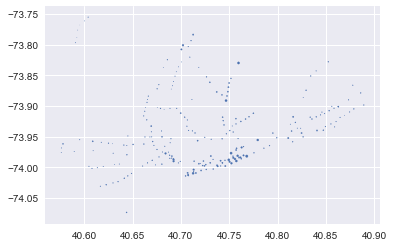

In [651]:
plt.scatter(data_by_location['latitude'], data_by_location['longitude'], s=scaled_entries)

# 20 : Three-Dimensional Data

Now that you've worked with one-dimensional and two-dimensional data, you might be wondering how to work with three or more dimensions.

### 3D data in NumPy
NumPy arrays can have arbitrarily many dimensions. Just like you can create a 1D array from a list, and a 2D array from a list of lists, you can create a 3D array from a list of lists of lists, and so on. For example, the following code would create a 3D array:

`a = np.array([
    [['A1a', 'A1b', 'A1c'], ['A2a', 'A2b', 'A2c']],
    [['B1a', 'B1b', 'B1c'], ['B2a', 'B2b', 'B2c']]
])`

### 3D data in Pandas
Pandas has a data structure called a Panel, which is similar to a DataFrame or a Series, but for 3D data. If you would like, you can learn more about Panels here.